In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Project\Dataset\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df[df['Route'].isna()|df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


In [11]:
df.dropna(inplace=True)

In [12]:
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        mins = int(duration.split()[1][:-1])    
        return hours*60 + mins  
    else: 
        return int(duration[:-1])*60

In [13]:
df.Duration = df.Duration.apply(convert_duration)

In [14]:
df['Dep_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_Min'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)
df['Arrival_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_Min'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

In [15]:
df['Journey_Date'] = pd.to_datetime(df.Date_of_Journey).dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey).dt.month

C:\Users\Admin\AppData\Local\Temp\ipykernel_8752\510464748.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Journey_Date'] = pd.to_datetime(df.Date_of_Journey).dt.day
C:\Users\Admin\AppData\Local\Temp\ipykernel_8752\510464748.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey).dt.month


In [16]:
df.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [17]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [18]:
df.Total_Stops.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [19]:
df.drop(columns='Additional_Info',axis=1,inplace=True)

In [20]:

df = pd.get_dummies(data= df,columns=['Airline','Destination','Source'],drop_first=True)

In [21]:
pd.set_option('display.max_columns',None)

In [22]:
df['Route_1'] = df['Route'].str.split('→').str[0]
df['Route_2'] = df['Route'].str.split('→').str[1]
df['Route_3'] = df['Route'].str.split('→').str[2]
df['Route_4'] = df['Route'].str.split('→').str[3]
df['Route_5'] = df['Route'].str.split('→').str[4]

In [23]:
df.drop('Route',axis = 1, inplace=True)

In [24]:
df = pd.get_dummies(data= df,columns=['Route_1','Route_2','Route_3','Route_4','Route_5'],drop_first=True)

In [25]:
df.head()

,Duration,Total_Stops,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Date,Journey_Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Route_1_BOM,Route_1_CCU,Route_1_DEL,Route_1_MAA,Route_2_ ATQ,Route_2_ BBI,Route_2_ BDQ,Route_2_ BHO,Route_2_ BLR,Route_2_ BLR,Route_2_ BOM,Route_2_ CCU,Route_2_ CCU,Route_2_ COK,Route_2_ COK,Route_2_ DED,Route_2_ DEL,Route_2_ DEL,Route_2_ GAU,Route_2_ GOI,Route_2_ GWL,Route_2_ HBX,Route_2_ HYD,Route_2_ HYD,Route_2_ IDR,Route_2_ IXA,Route_2_ IXB,Route_2_ IXC,Route_2_ IXR,Route_2_ IXU,Route_2_ IXZ,Route_2_ JAI,Route_2_ JDH,Route_2_ JLR,Route_2_ KNU,Route_2_ LKO,Route_2_ MAA,Route_2_ NAG,Route_2_ NDC,Route_2_ PAT,Route_2_ PNQ,Route_2_ RPR,Route_2_ STV,Route_2_ TRV,Route_2_ UDR,Route_2_ VGA,Route_2_ VNS,Route_2_ VTZ,Route_3_ BBI,Route_3_ BHO,Route_3_ BLR,Route_3_ BOM,Route_3_ CCU,Route_3_ COK,Route_3_ COK,Route_3_ DEL,Route_3_ DEL,Route_3_ GAU,Route_3_ GOI,Route_3_ HBX,Route_3_ HYD,Route_3_ HYD,Route_3_ IDR,Route_3_ IMF,Route_3_ ISK,Route_3_ IXC,Route_3_ IXR,Route_3_ JAI,Route_3_ JDH,Route_3_ MAA,Route_3_ NAG,Route_3_ PNQ,Route_3_ TRV,Route_3_ UDR,Route_3_ VGA,Route_3_ VTZ,Route_4_ BBI,Route_4_ BHO,Route_4_ BLR,Route_4_ BOM,Route_4_ COK,Route_4_ DEL,Route_4_ DEL,Route_4_ GWL,Route_4_ HYD,Route_4_ HYD,Route_4_ NAG,Route_4_ TRV,Route_5_ COK,Route_5_ DEL,Route_5_ HYD,Route_5_ VGA
0,170,0,3897,22,20,1,10,24,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,445,2,7662,5,50,13,15,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1140,2,13882,9,25,4,25,6,9,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,325,1,6218,18,5,23,30,5,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,285,1,13302,16,50,21,35,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(10682, 121)

[]

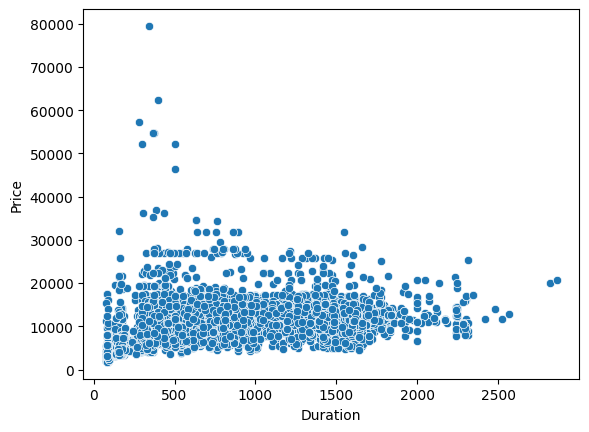

In [27]:
sns.scatterplot(x=df.Duration,y=df.Price)
plt.plot()

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

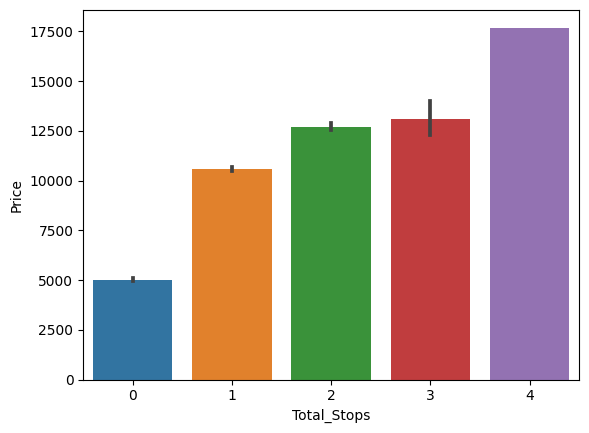

In [28]:
sns.barplot(x=df.Total_Stops,y=df.Price,estimator='mean')

<AxesSubplot: xlabel='Journey_Month', ylabel='count'>

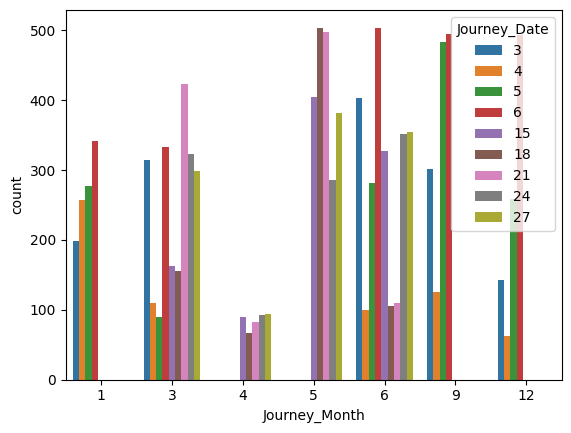

In [32]:
sns.countplot(x=df.Journey_Month,hue=df.Journey_Date)

<AxesSubplot: xlabel='Journey_Month', ylabel='Price'>

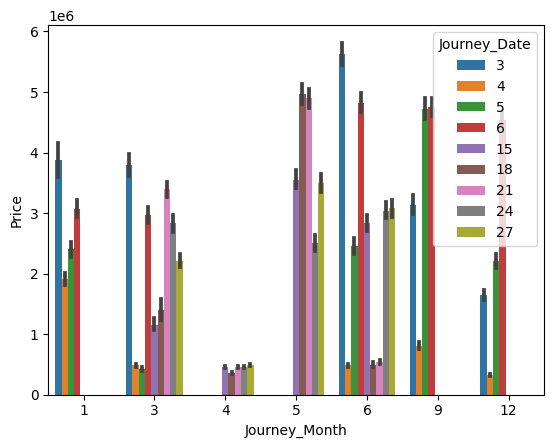

In [33]:
sns.barplot(x=df.Journey_Month,y=df.Price,estimator='sum',hue=df.Journey_Date)

In [34]:
df.groupby(by=df.Total_Stops).sum()

,Duration,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Date,Journey_Month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Route_1_BOM,Route_1_CCU,Route_1_DEL,Route_1_MAA,Route_2_ ATQ,Route_2_ BBI,Route_2_ BDQ,Route_2_ BHO,Route_2_ BLR,Route_2_ BLR,Route_2_ BOM,Route_2_ CCU,Route_2_ CCU,Route_2_ COK,Route_2_ COK,Route_2_ DED,Route_2_ DEL,Route_2_ DEL,Route_2_ GAU,Route_2_ GOI,Route_2_ GWL,Route_2_ HBX,Route_2_ HYD,Route_2_ HYD,Route_2_ IDR,Route_2_ IXA,Route_2_ IXB,Route_2_ IXC,Route_2_ IXR,Route_2_ IXU,Route_2_ IXZ,Route_2_ JAI,Route_2_ JDH,Route_2_ JLR,Route_2_ KNU,Route_2_ LKO,Route_2_ MAA,Route_2_ NAG,Route_2_ NDC,Route_2_ PAT,Route_2_ PNQ,Route_2_ RPR,Route_2_ STV,Route_2_ TRV,Route_2_ UDR,Route_2_ VGA,Route_2_ VNS,Route_2_ VTZ,Route_3_ BBI,Route_3_ BHO,Route_3_ BLR,Route_3_ BOM,Route_3_ CCU,Route_3_ COK,Route_3_ COK,Route_3_ DEL,Route_3_ DEL,Route_3_ GAU,Route_3_ GOI,Route_3_ HBX,Route_3_ HYD,Route_3_ HYD,Route_3_ IDR,Route_3_ IMF,Route_3_ ISK,Route_3_ IXC,Route_3_ IXR,Route_3_ JAI,Route_3_ JDH,Route_3_ MAA,Route_3_ NAG,Route_3_ PNQ,Route_3_ TRV,Route_3_ UDR,Route_3_ VGA,Route_3_ VTZ,Route_4_ BBI,Route_4_ BHO,Route_4_ BLR,Route_4_ BOM,Route_4_ COK,Route_4_ DEL,Route_4_ DEL,Route_4_ GWL,Route_4_ HYD,Route_4_ HYD,Route_4_ NAG,Route_4_ TRV,Route_5_ COK,Route_5_ DEL,Route_5_ HYD,Route_5_ VGA
Total_Stops,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,523945,17541927,44986,88825,43693,99950,46072,18388,417,92,1241,623,0,0,0,670,0,264,3,213,1265,621,381,287,381,213,724,621,621,724,213,381,0,0,0,0,724,0,0,381,0,213,0,0,1552,0,0,0,0,0,621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4398415,59591945,69850,130430,79138,123885,69184,31604,540,102,793,2535,4,1145,13,148,1,215,0,3185,0,44,0,562,0,3185,1834,44,44,1834,3185,0,0,61,8,0,0,235,3757,0,12,0,15,0,0,598,44,8,0,0,0,416,5,1,20,0,0,0,0,0,0,1,10,20,243,12,1,10,66,0,2,16,0,9,0,1,0,0,1834,0,0,3185,0,562,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875275,19328028,18212,40390,19031,38990,19728,8856,756,0,19,691,2,43,0,0,0,0,0,1113,0,30,0,75,0,1113,302,30,30,302,1113,0,40,51,30,57,0,0,108,0,60,0,1,3,0,61,39,64,0,0,0,149,101,0,1,13,52,12,1,260,40,0,0,41,16,71,0,0,0,2,0,2,19,6,11,0,11,11,0,1085,0,0,68,0,120,11,16,6,0,14,5,0,4,1,0,0,6,85,10,10,2,3,14,3,0,0,302,0,1113,75,0,0,30,0,0,0,0,0,0,0
3,69635,590040,376,1045,723,900,492,273,37,0,0,0,0,8,0,0,0,0,0,25,0,2,0,7,0,25,11,2,2,11,25,0,0,2,0,0,0,1,2,0,2,0,0,0,0,4,5,0,8,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,2,0,0,3,1,0,4,0,0,0,0,0,0,0,10,5,0,0,2,1,0,0,17,0,0,0,0,0,1,1,0,25,0,0,8,2,0,2,1,4,25,7,2,0
4,1770,17686,5,50,11,20,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [35]:
x = df.drop('Price',axis=True)
y = df.Price

# Random Forest

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1,max_depth=10)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10)

In [38]:
# For Training data
print('Mean Squared Error:', mean_squared_error(y_train, rf.predict(x_train)))
print('Mean Absolute Error:', mean_absolute_error(y_train, rf.predict(x_train)))
print('r2 score:',rf.score(x_train, y_train)) # r2 score

Mean Squared Error: 2234078.269165812
Mean Absolute Error: 1050.5846059367536
r2 score: 0.8930346452738316


In [39]:
y_pred = rf.predict(x_test)

In [40]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))

Mean Squared Error: 3562219.0369030843
Mean Absolute Error: 1190.652276281396
r2 score: 0.843545926825185


In [41]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
random_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)

random_search.fit(x_train, y_train)


best_params = random_search.best_params_
print(best_params)


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [44]:
best_model = random_search.best_estimator_

In [45]:
x_pred = best_model.predict(x_train)
print('Mean Squared Error:', mean_squared_error(y_train, x_pred))
print('Mean Absolute Error:', mean_absolute_error(y_train, x_pred))
print('R-squared:', r2_score(y_train, x_pred))

Mean Squared Error: 2240423.029274178
Mean Absolute Error: 1052.7534729565793
R-squared: 0.8927308647281762


In [46]:
y_pred = best_model.predict(x_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 3446580.00952514
Mean Absolute Error: 1184.164179324018
R-squared: 0.8486248387797353


# XGBoost

In [48]:
import xgboost as xgb

In [49]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


xg_reg.fit(x_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [50]:
x_pred = xg_reg.predict(x_train)
print('Mean Squared Error:', mean_squared_error(y_train, x_pred))
print('Mean Absolute Error:', mean_absolute_error(y_train, x_pred))
print('R-squared:', r2_score(y_train, x_pred))


Mean Squared Error: 3145876.077137973
Mean Absolute Error: 1240.5068420231587
R-squared: 0.8493787101553621


In [51]:
y_pred = xg_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 3751175.678547302
Mean Absolute Error: 1281.6918940742717
R-squared: 0.8352468761681617


In [52]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': [3, 5, 7],
    'subsample': np.arange(0.8, 1.0, 0.05),
    'colsample_bytree': np.arange(0.8, 1.0, 0.05)
}

In [53]:
random_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=10, random_state=42)

random_search.fit(x_train, y_train)


best_params = random_search.best_params_


best_model = random_search.best_estimator_


print('Train:')
x_pred = best_model.predict(x_train)
print('Mean Squared Error:', mean_squared_error(y_train, x_pred))
print('Mean Absolute Error:', mean_absolute_error(y_train, x_pred))
print('R-squared:', r2_score(y_train, x_pred))



y_pred = best_model.predict(x_test)

print('Test')

mse = mean_squared_error(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse)
print('mean absolute error', mean_absolute_error(y_test,y_pred))
print('r2_score', r2_score(y_test,y_pred))

Train:
Mean Squared Error: 1379797.1022651598
Mean Absolute Error: 806.7668131177087
R-squared: 0.9339367431611779
Test
Best Hyperparameters: {'subsample': 0.9000000000000001, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.13, 'colsample_bytree': 0.8}
Mean Squared Error on Test Set: 3072613.062570281
mean absolute error 1081.7653974819584
r2_score 0.8650496154365642


# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
lr.fit(x_train,y_train)

print('Train')
x_pred = lr.predict(x_train)
print('r2 score', r2_score(y_train,x_pred))

print('Test')
y_pred = lr.predict(x_test)
print('r2 score', r2_score(y_test,y_pred))

Train
r2 score 0.6681282551478731
Test
r2 score 0.6718385026487481
